In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # 메모리 사용 제한을 위한 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # 특정 GPU만 사용하도록 설정
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
    # 프로그램 시작 후에는 GPU 설정을 변경할 수 없으므로
    # 런타임 오류 발생 시 예외 처리가 필요함
        print(e)

Num GPUs Available:  1


## 데이터 불러오기

In [2]:
# 필요한 라이브러리 임포트
from sklearn.preprocessing import LabelEncoder  # LabelEncoder를 사용하기 위해 임포트
from sklearn.model_selection import train_test_split  # train_test_split을 사용하기 위해 임포트
import os  # 파일 및 디렉토리 관리를 위해 임포트
import cv2  # OpenCV 라이브러리를 사용하기 위해 임포트
import numpy as np  # 배열 및 행렬 작업을 위해 임포트
import matplotlib.pyplot as plt  # 데이터 시각화를 위해 임포트
import seaborn as sns  # 시각화를 위해 Seaborn 라이브러리 임포트

# 데이터 로드 함수 정의
def load_data(data_directory):
    images = []  # 이미지 데이터를 저장할 리스트
    labels = []  # 레이블 데이터를 저장할 리스트
    classes = []  # 클래스 목록을 저장할 리스트
    label_encoder = LabelEncoder()  # LabelEncoder 객체 생성

    for class_name in os.listdir(data_directory):
        class_path = os.path.join(data_directory, class_name)
        if os.path.isdir(class_path):  # 디렉토리인 경우에만 처리
            classes.append(class_name)

            for filename in os.listdir(class_path):
                filepath = os.path.join(class_path, filename)
                img = cv2.imread(filepath)  # 이미지 파일 읽기
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB로 변환
                    img = cv2.resize(img, (224, 224))  # 크기 조정
                    img = img / 255.0  # 정규화
                    images.append(img)  # 이미지 리스트에 추가
                    labels.append(class_name)  # 레이블 리스트에 클래스 이름 추가

    images = np.array(images)  # 이미지 데이터를 NumPy 배열로 변환
    labels = label_encoder.fit_transform(labels)  # 레이블을 숫자로 변환
    classes = label_encoder.classes_  # 클래스 목록을 저장

    return images, labels, classes

# 훈련 데이터셋 로드
train_data_directory = '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train'
train_images, train_labels, train_classes = load_data(train_data_directory)

# 테스트 데이터셋 로드
test_data_directory = '/aiffel/aiffel/jellyfish/Train_Test_Valid/test'
test_images, test_labels, test_classes = load_data(test_data_directory)

# 검증 데이터셋 로드
valid_data_directory = '/aiffel/aiffel/jellyfish/Train_Test_Valid/valid'
valid_images, valid_labels, valid_classes = load_data(valid_data_directory)

In [4]:
# 데이터셋 확인
print("훈련 데이터셋 크기:", len(train_images))
print("테스트 데이터셋 크기:", len(test_images))
print("검증 데이터셋 크기:", len(valid_images))

훈련 데이터셋 크기: 900
테스트 데이터셋 크기: 40
검증 데이터셋 크기: 39


## 데이터 시각화

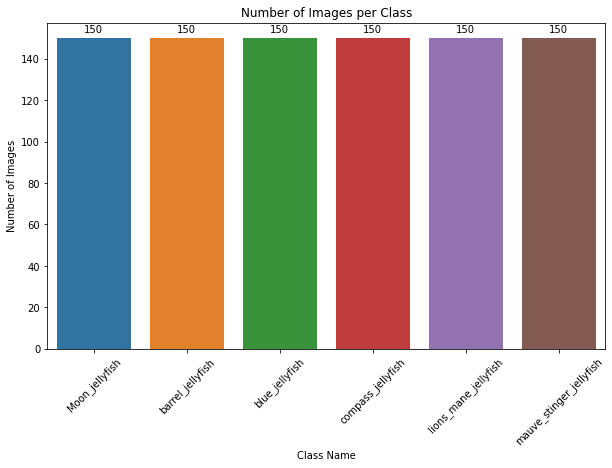

In [5]:
import pandas as pd

# 클래스별 이미지 개수 계산
class_counts = pd.Series(train_labels).value_counts().sort_index()
class_counts.index = train_classes  # 인덱스를 클래스 이름으로 변경

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values)

# 각 막대에 숫자 표시
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# 그래프 제목 및 레이블 설정
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

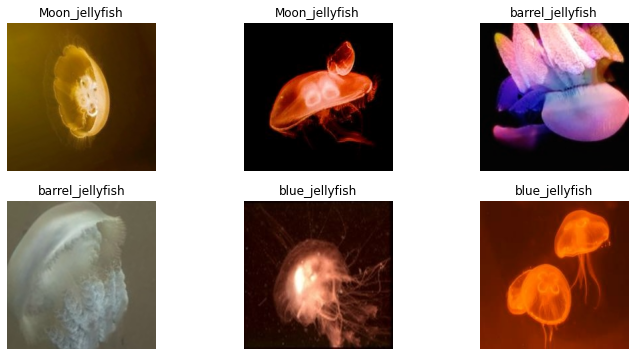

In [6]:
import random

# 클래스의 이름과 수를 파악합니다.
class_names = train_classes  # train_images에서 train_classes로 변경
num_classes = len(class_names)

# 1행: 클래스 별로 랜덤한 이미지 선택하여 출력
plt.figure(figsize=(12, 6))
for i in range(6):
    class_idx = i // 2  # 2개의 이미지를 1행에 출력하기 위해 클래스 인덱스 계산
    class_images = train_images[train_labels == class_idx]  # 해당 클래스의 이미지 가져오기
    random_index = random.randint(0, len(class_images) - 1)  # 랜덤한 이미지 인덱스 선택
    selected_image = class_images[random_index]

    # 이미지를 정규화 해제하여 BGR 색상으로 변환
    restored_image = selected_image * 255.0  # 정규화를 해제하기 위해 255를 곱합니다.
    restored_image = restored_image.astype("uint8")  # 정수형 데이터로 변환합니다.
    restored_image = cv2.cvtColor(restored_image, cv2.COLOR_RGB2BGR)  # RGB에서 BGR로 변환합니다.

    plt.subplot(2, 3, i + 1)
    plt.imshow(restored_image)
    plt.title(class_names[class_idx])  # 클래스 이름을 제목으로 표시
    plt.axis("off")

plt.show()